# Multiple Linear Regression

## Data set prep


In [5]:
# Import house pricing dataset
from sklearn.datasets import fetch_california_housing

In [4]:
## Impport required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
california = fetch_california_housing()

In [10]:
type(california)

sklearn.utils._bunch.Bunch

In [11]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [21]:
independent_features_names = california.feature_names
california_data = california.data
target_features_name = california.target_names
target_values = california.target
dataset_description = california.DESCR

In [24]:
print(dataset_description)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [26]:
# Prepare a Data Frame 
df = pd.DataFrame(data=california_data, columns=independent_features_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [28]:
# Prepare Target 
df['Price']=california.target

In [29]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Cleaning

In [30]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [31]:
## Here all the values are in the required format , no need to change

In [32]:
# Lets check for Null Values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [34]:
## Here we dont have any null values , no need to imputation performing

<Axes: >

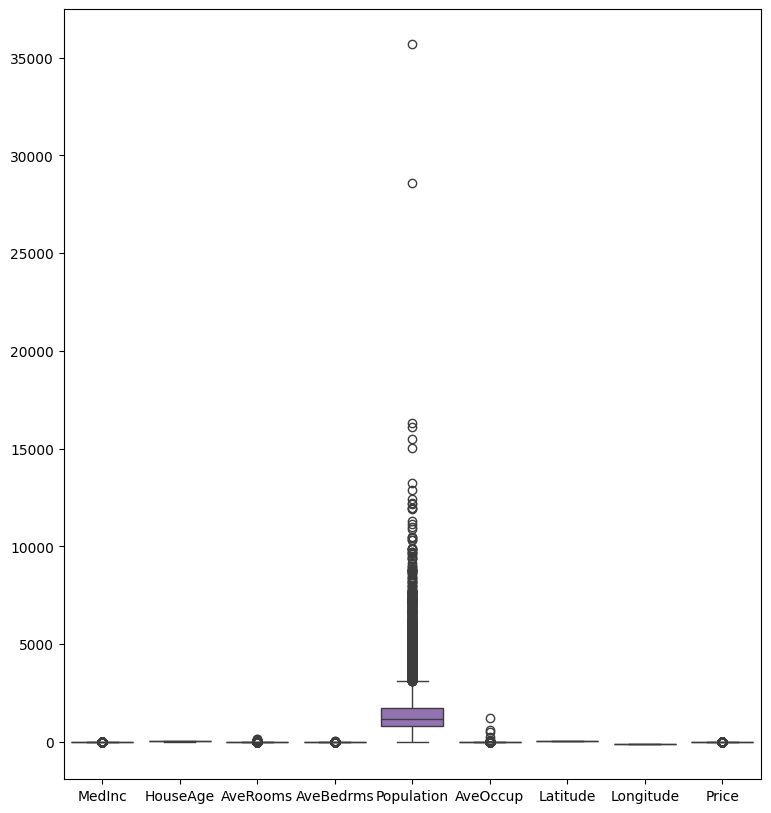

In [37]:
# Lets check for outliers 
plt.figure(figsize=(9, 10))
sns.boxplot(data=df)

In [38]:
## From this population seems like over distributed lets check  
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Figure size 1000x1500 with 0 Axes>

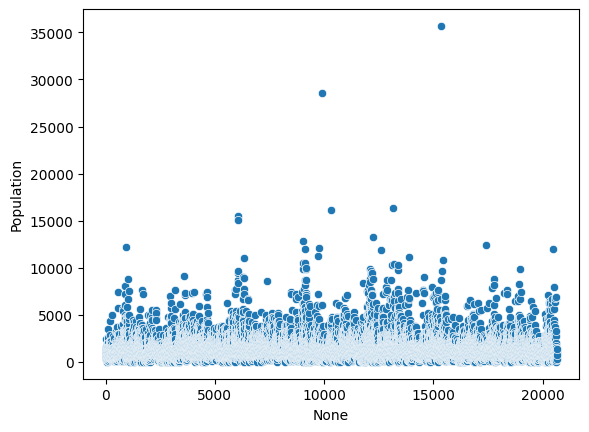

<Figure size 1000x1500 with 0 Axes>

In [52]:
sns.scatterplot(x=df.index, y=df['Population'])
plt.figure(figsize=(10,15))

In [56]:
## seems like few outliers are their because of that we are getting issue

filtered_df = df[df['Population'] > 17000]
count = filtered_df.count()

print(count)
print(filtered_df)

MedInc        2
HouseAge      2
AveRooms      2
AveBedrms     2
Population    2
AveOccup      2
Latitude      2
Longitude     2
Price         2
dtype: int64
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
9880   2.3087      11.0  5.364518   1.059684     28566.0  4.696810     36.64   
15360  2.5729      14.0  5.270497   1.010484     35682.0  7.482072     33.35   

       Longitude  Price  
9880     -121.79  1.188  
15360    -117.42  1.344  


In [85]:
# Lets drop these outliers from the dataset
filtered_df = df[df['Population'] <= 20000]


In [86]:
filtered_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

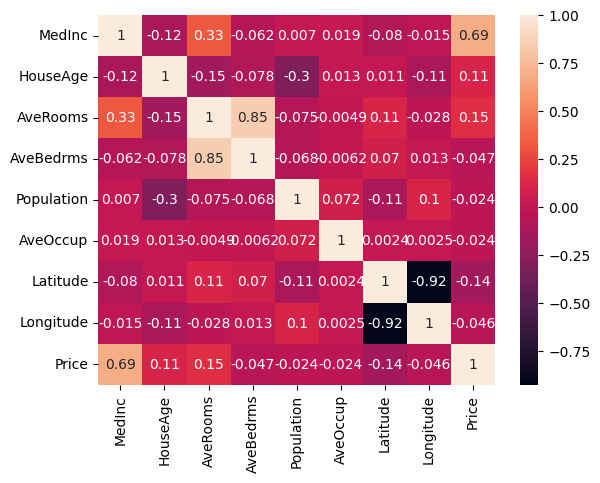

In [87]:
# Lets check the correlation
sns.heatmap(filtered_df.corr(),annot=True)


In [88]:
# Here lalitude & longitiude are correlating , those are important 
# Here what we can do is we can combine both as a single feature by giving important , but for now i am proceeding with 2 variables

In [89]:
df.shape

(20640, 9)

In [90]:
filtered_df.shape

(20638, 9)

## Train Test Split

In [91]:
## Independent and Dependent features
X=filtered_df.iloc[:,:-1] #independent features
y=filtered_df.iloc[:,-1] #dependent features

In [92]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [93]:
X.shape

(20638, 8)

In [94]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test , y_train, y_test = train_test_split(X,y,random_state=10, test_size=0.33)

In [107]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13827, 8), (13827,), (6811, 8), (6811,))

## Feature Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [109]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
X_train

array([[ 4.92668802e+00,  1.68914724e+00,  9.07198706e-01, ...,
        -2.29715112e-02, -7.40697491e-01,  5.33997876e-01],
       [ 1.17889490e-03, -6.03291373e-01, -2.46955782e-01, ...,
        -6.10176742e-02,  9.50222844e-01, -1.24928874e+00],
       [ 5.51893924e-01, -9.19489803e-01,  5.57645101e-01, ...,
        -5.10550351e-02, -4.27737097e-01, -4.47307885e-01],
       ...,
       [ 9.18305915e-01, -1.86808509e+00,  2.13547743e-01, ...,
         2.83421382e-02,  7.96078173e-01, -1.09487006e+00],
       [-8.70760447e-01,  5.03403130e-01, -1.09436223e+00, ...,
         9.56563564e-02, -7.68723795e-01,  6.63510311e-01],
       [-6.64882253e-01, -7.61390588e-01, -5.66673240e-01, ...,
         1.60185746e-01,  7.96078173e-01, -1.13970129e+00]])

In [113]:
X_test

array([[-0.40091308,  0.66150234,  0.00544979, ..., -0.00664856,
         1.14640697, -1.32400745],
       [ 0.3543219 , -1.31473784,  0.41439368, ..., -0.01782724,
         1.333249  , -1.58303232],
       [ 1.59486732, -0.04994412,  0.62408555, ..., -0.04558366,
        -0.97425002,  0.89762894],
       ...,
       [-0.89776857, -0.9194898 ,  0.65631603, ..., -0.06362134,
         2.51502481, -1.97156963],
       [-0.28180567,  0.97770077, -0.819843  , ...,  0.10956446,
        -0.73602644,  0.68841655],
       [-0.72600316,  1.2148496 , -0.70083852, ...,  0.02562914,
         0.9735781 , -1.44355739]])

## Choose Model

- since this is practice i am choosing only Linear Regresssion, later on will choose the better model for this use

In [115]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [116]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [118]:
# Slope
linear_reg_model.coef_


array([ 0.83677808,  0.11920663, -0.27400085,  0.33275641,  0.00265731,
       -0.04092008, -0.93734982, -0.90030095])

In [119]:
## intercepts
linear_reg_model.intercept_

np.float64(2.0688270398495665)

In [120]:
# Predict the data 
y_pred = linear_reg_model.predict(X_test)

In [121]:
y_pred

array([1.88802824, 2.22485716, 3.27162891, ..., 0.78801061, 2.23089934,
       2.1379521 ])

## Perfomance Metrics

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mean_squared_error = mean_squared_error(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)
print(mean_squared_error)
print(mean_absolute_error)
print(np.sqrt(mean_squared_error))



0.5431570026090725
0.5347006541791501
0.7369918606124986


In [126]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
# adjusted r2_score
adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_score)

0.5894088066368237
0.5889259002053469
